<img src="../img1.png">

<h1>House Price Index (HPI)</h1>

<p>A house price index (HPI) measures the price changes of residential housing as a percentage change from some specific start date (which has HPI of 100).</p>

<p>Published by the several agencies such as <b>Federal Housing Finance Agency (FHFA)</b> or <b> Case-Shiller House Price Index</b>, using monthly and quarterly data supplied by <b>Fannie Mae </b> and <b>Freddie Mac</b>.</p>

<p>The HPI is based on transactions involving conventional and conforming mortgages on <b>single-family properties</b>. It is a weighted repeat sales index, measuring average price changes in repeat sales or refinancings on the same properties.</p>

<h2>How the House Price Index (HPI) Is Used</h2>
<p>
The HPI is one of many economic indicators that investors use to keep a pulse on broader economic trends and potential shifts in the stock market. <u>Price increases</u> generally create <b>more jobs, stimulate confidence and prompt higher consumer spending</b>. This paves the way for greater <b>aggregate demand, boosting gross domestic product (GDP) and overall economic growth</b>.
</p>

<h3>The House Price Index (HPI) vs. The Case-Shiller Home Price Indexes</h3>

<p>These indexes utilize different data and measuring techniques and, therefore, produce varying results. For example, the HPI (FHFA) weights all homes equally, while the Case-Shiller Home Price indexes are value-weighted.

Moreover, while the Case-Shiller indexes only use purchase prices, the all-transactions HPI (FHFA) includes refinance appraisals as well. The HPI also provides wider coverage.</p>

<h2>S&P/Case-Shiller U.S. National Home Price Index (CSUSHPISA)</h2>

<h3>What Is a Seasonal Adjustment?</h3>


A seasonal adjustment is a statistical technique designed to even out periodic swings in statistics or movements in supply and demand related to changing seasons. It can, therefore, eliminate misleading seasonal components of an economic time series. 

### Case-Shiller U.S. National Home Price Index 
**CSUSHPISA**: Case-Shiller U.S. National Home Price Index Seasonally Adjusted

**Units**: Index Jan 2000=100, Seasonally Adjusted, Monthly

Data is preprocessed and feature engineering has already been done in House Index Preprocessing Notebook.


Observations are from 2000-01 upto 2020-12 Monthly Index

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [47]:
df = pd.read_csv("Dataset.csv", parse_dates=[0])

# Time Series Columns

These time series columns may provide us seasonal variations and time correspondance.

In [37]:
df["Year"] = pd.DatetimeIndex(df["DATE"]).year

In [39]:
df["Month"] = pd.DatetimeIndex(df["DATE"]).month

In [42]:
df.to_csv("Dataset.csv", index= False)

In [137]:
df.columns

Index(['DATE', 'MORTGAGE15US_Monthly Change', 'MORTGAGE30US_Monthly Change',
       'MORTGAGE5US_Monthly Change', 'Rent Index Mon_Chg', 'NASDAQCOM Mon_Chg',
       'WILL5000 Per_Mon_Chg', 'House Completed', 'House Under Construction',
       '5yr_Maturity Per_Mon_Chg', '10yr_Maturity Per_Mon_Chg',
       '30yr_Maturity Per_Mon_Chg', 'CPI Mon_Chg',
       'House Index Monthly Change', 'Year', 'Month'],
      dtype='object')

`DATE`: Month and Year of the observation

`MORTGAGE15US_Monthly Change`: 15 Year Constant Interest Rate on Mortgage

`MORTGAGE30US_Monthly Change`: 30 Year Constant Interest Rate on Mortgage

`MORTGAGE5US_Monthly Change`: 5 Year Constant and every next year Increasing Interest Rate on Mortgage (1 yr- Adjustable)

`Rent Index Mon_Chg`: Rent Index Monthly Change

`NASDAQCOM Mon_Chg`: NASDAQ Composite Index Monthly Change

`WILL5000 Per_Mon_Chg`: WILL5000 Index Monthly Percent Change

`House Completed`: New Houses Completed on that Month

`House Under Construction`: New Houses under Construction that Month

`5yr_Maturity Per_Mon_Chg`: Treasury Bond 5 yr Maturity Interest Percent Monthly Change

`10yr_Maturity Per_Mon_Chg`: Treasury Bond 10 yr Maturity Interest Percent Monthly Change

`30yr_Maturity Per_Mon_Chg`: Treasury Bond 30 yr Maturity Interest Percent Monthly Change

`CPI Mon_Chg`: Consumer Price Index Monthly Change

`House Index Monthly Change`: House Price Index Monthly Change

`Year`: Year

`Month`: Month

In [45]:
df = df.drop("Day of Week", axis =1)

In [46]:
df.to_csv("Dataset.csv", index= False)

In [49]:
df.describe()

,MORTGAGE15US_Monthly Change,MORTGAGE30US_Monthly Change,MORTGAGE5US_Monthly Change,Rent Index Mon_Chg,NASDAQCOM Mon_Chg,WILL5000 Per_Mon_Chg,House Completed,House Under Construction,5yr_Maturity Per_Mon_Chg,10yr_Maturity Per_Mon_Chg,30yr_Maturity Per_Mon_Chg,CPI Mon_Chg,House Index Monthly Change,Year,Month
count,252.000000,252.000000,192.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,-0.022161,-0.021929,-0.011716,0.358145,0.901130,0.532949,9.545357,5.393968,-0.488793,-0.334294,-0.395329,0.216250,0.536012,2010.000000,6.500000
std,0.159897,0.167541,0.114213,0.153565,6.738026,4.495364,3.955034,2.126262,10.908894,9.348693,5.365346,0.371144,0.975878,6.067351,3.458922
min,-0.752000,-0.801500,-0.408000,-0.166950,-22.009950,-17.706162,3.680000,2.350000,-55.303030,-38.053097,-28.250000,-2.269340,-2.524000,2000.000000,1.000000
25%,-0.108875,-0.122625,-0.073625,0.276390,-1.963723,-1.917886,6.040000,3.440000,-5.634848,-5.028490,-2.925075,0.055528,0.213250,2005.000000,3.750000
50%,-0.035500,-0.038500,-0.018000,0.360420,1.058660,1.067772,8.550000,5.200000,-1.040584,-0.233724,-0.545955,0.238040,0.696000,2010.000000,6.500000
75%,0.043125,0.056250,0.043500,0.463515,3.531090,3.411108,13.082500,6.890000,4.487241,4.247392,2.681090,0.415095,1.000250,2015.000000,9.250000
max,0.620500,0.631500,0.327000,0.730790,32.665880,13.132351,19.110000,9.900000,42.962963,30.909091,14.696486,1.594800,3.731000,2020.000000,12.000000


5 year adjustable mortgage has missing values. 60

In [138]:
df_n = df.drop(columns=["MORTGAGE5US_Monthly Change", "WILL5000 Per_Mon_Chg", "DATE"])

As the dataset is small and we have quite number of features therefore I am dropping 5 Year adjustable Mortgage feature. `MORTGAGE5US_Monthly Change`

Distributing train, test data

Taking most recent 2 years as test data for prediction

In [139]:
train_df = df_n[1:-24]

In [140]:
test_df = df_n[-24:]

In [141]:
x_train = train_df.drop("House Index Monthly Change", axis=1).values

In [142]:
y_train = train_df["House Index Monthly Change"].values

In [143]:
x_test = test_df.drop("House Index Monthly Change", axis=1).values
y_test = test_df["House Index Monthly Change"].values

In [144]:
print(len(x_train), len(y_train))

227 227


# Linear Regression Model Sklearn

In [145]:
linear_model = LinearRegression()

In [146]:
linear_model.fit(x_train, y_train)

LinearRegression()

In [147]:
linear_model.score(x_train, y_train)

0.30271448354532493

In [148]:
preds = linear_model.predict(x_test)

In [149]:
from sklearn.metrics import r2_score
score = r2_score(y_test, preds)
score

0.13585856509509653

In [150]:
from sklearn.metrics import mean_squared_error
acc_score = mean_squared_error(y_test, preds)
acc_score

0.9573928754627389

# Random Forest Model

In [151]:
from sklearn.ensemble import RandomForestRegressor

### Model with default values

In [152]:
random_forest_reg = RandomForestRegressor(max_depth= 3, random_state=42)

In [153]:
random_forest_reg.fit(x_train, y_train)

RandomForestRegressor(max_depth=3, random_state=42)

In [154]:
random_forest_reg.score(x_test, y_test)

-0.16156228526251804

### Customized Hyperparameter Model

In [155]:
forest = RandomForestRegressor(n_estimators=5, max_depth= 10, random_state=42)

In [156]:
forest.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=5, random_state=42)

In [157]:
preds = forest.predict(x_test)

In [158]:
preds

array([0.57125714, 0.63125714, 0.9654    , 0.9576    , 0.77195   ,
       0.8124    , 0.6628    , 0.6584    , 0.9708    , 0.77224   ,
       0.87865714, 0.82905714, 0.9056    , 0.56965714, 0.7662    ,
       0.8618    , 0.78217667, 0.9252    , 0.7712    , 0.9632    ,
       0.77164   , 0.924     , 0.65188   , 0.948     ])

In [159]:
y_test

array([0.414, 0.396, 0.641, 0.73 , 0.638, 0.343, 0.385, 0.686, 0.693,
       0.714, 0.916, 0.992, 1.051, 0.992, 1.246, 0.866, 0.216, 0.418,
       1.36 , 2.782, 3.176, 3.731, 3.334, 2.954])

In [160]:
mean_squared_error(y_test, preds)

1.2584209494531595

In [161]:
forest.score(x_test, y_test)

-0.1358489423156013

In [162]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Predicted Monthly Change')

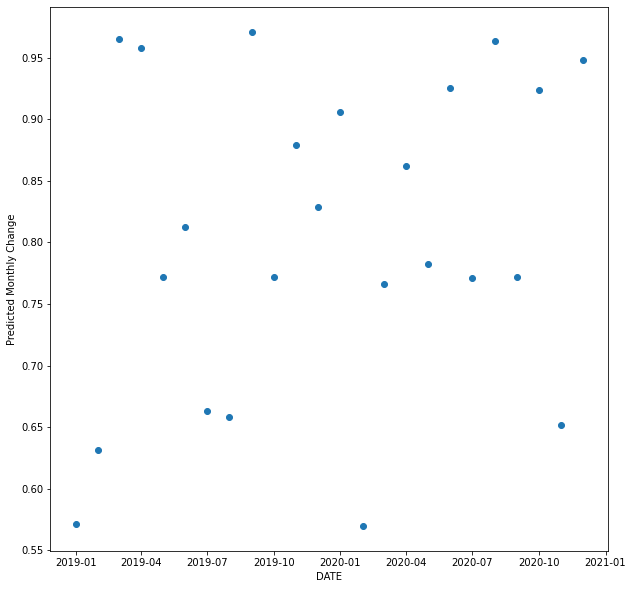

In [164]:
plt.figure(figsize=(10, 10))
plt.scatter(x= df["DATE"][-24:], y= [preds])
plt.xlabel("DATE")
plt.ylabel("Predicted Monthly Change")

Text(0, 0.5, 'Predicted Monthly Change')

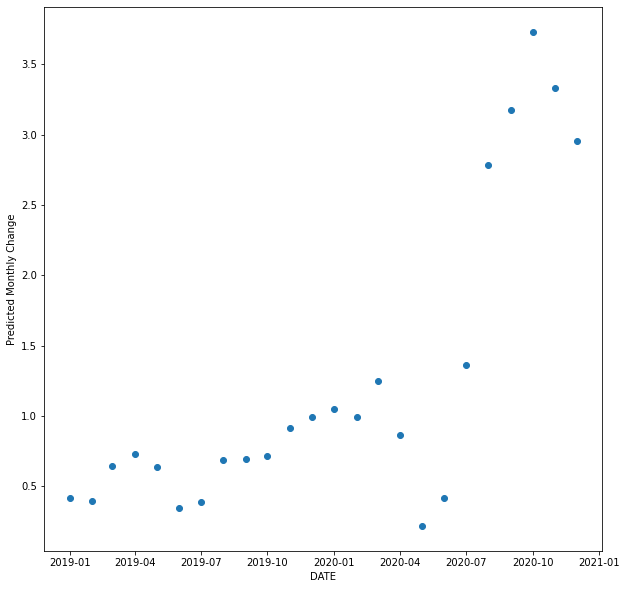

In [135]:
plt.figure(figsize=(10, 10))
plt.scatter(x= df["DATE"][-24:], y= [y_test])
plt.xlabel("DATE")
plt.ylabel("Predicted Monthly Change")

The dataset is very small, experimentation results are not very satisfying.

Dropping more features: 
`Year`
`Month`
`5yr_Maturity Per_Mon_Chg`
`10yr_Maturity Per_Mon_Chg`
`30yr_Maturity Per_Mon_Chg`

In [168]:
df_f = df_n.drop(["Year", "Month", "5yr_Maturity Per_Mon_Chg", "10yr_Maturity Per_Mon_Chg", "30yr_Maturity Per_Mon_Chg"], axis =1)

In [169]:
tr_df = df_f[1:-24]

In [170]:
tst_df = df_f[-24:]

In [171]:
x_tr = tr_df.drop("House Index Monthly Change", axis=1).values

In [172]:
y_tr = tr_df["House Index Monthly Change"].values

In [173]:
x_tst = tst_df.drop("House Index Monthly Change", axis=1).values
y_tst = tst_df["House Index Monthly Change"].values

In [174]:
print(len(x_tr), len(y_tr))

227 227


# Linear Regression Model Sklearn

In [175]:
linear_model = LinearRegression()

In [176]:
linear_model.fit(x_tr, y_tr)

LinearRegression()

In [177]:
linear_model.score(x_tr, y_tr)

0.17980429359611472

In [178]:
preds = linear_model.predict(x_tst)

In [179]:
from sklearn.metrics import r2_score
score = r2_score(y_tst, preds)
score

-0.7833334855373053

In [181]:
from sklearn.metrics import mean_squared_error
err_score = mean_squared_error(y_tst, preds)
err_score

1.9757770020777201

# Random Forest Model

In [182]:
from sklearn.ensemble import RandomForestRegressor

### Model with default values

In [183]:
random_forest_reg = RandomForestRegressor(max_depth= 3, random_state=42)

In [184]:
random_forest_reg.fit(x_tr, y_tr)

RandomForestRegressor(max_depth=3, random_state=42)

In [185]:
random_forest_reg.score(x_tst, y_tst)

-0.9791592496162065